In [1]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [3]:
df = pd.read_csv('C:/JN/StudentsPerformance_3_lyst1729690388778.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X= df.drop(columns=['math score'],axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].unique())

Categories in 'gender' variable: ['female' 'male']


In [8]:
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:", end=" ")
print(df['race/ethnicity'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']


In [9]:
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of eductaion' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of eductaion' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [10]:
Y = df['math score']

In [11]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [12]:
num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_tran=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_tran,cat_cols),
        ("StandardScaler",num_trans,num_cols),
    ]
)

In [13]:
x=preprocessor.fit_transform(X)

In [14]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
x.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=23)

In [17]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2

In [19]:
models={
    "LR":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2=evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set ')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))
    print('---------------------')
    
    print('Model performance for Testing set ')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LR
Model performance for Training set 
- Root Mean Squared Error: 5.2633
- Mean Absolute Error: 4.1697
- R2 Score: 0.8813
---------------------
Model performance for Testing set 
- Root Mean Squared Error: 5.6228
- Mean Absolute Error: 4.5788
- R2 Score: 0.8523


Lasso
Model performance for Training set 
- Root Mean Squared Error: 6.5500
- Mean Absolute Error: 5.1997
- R2 Score: 0.8162
---------------------
Model performance for Testing set 
- Root Mean Squared Error: 6.5967
- Mean Absolute Error: 5.1005
- R2 Score: 0.7967


Ridge
Model performance for Training set 
- Root Mean Squared Error: 5.2594
- Mean Absolute Error: 4.1672
- R2 Score: 0.8815
---------------------
Model performance for Testing set 
- Root Mean Squared Error: 5.6191
- Mean Absolute Error: 4.5672
- R2 Score: 0.8525


KNN
Model performance for Training set 
- Root Mean Squared Error: 5.7594
- Mean Absolute Error: 4.5617
- R2 Score: 0.8579
---------------------
Model performance for Testing set 
- Root Mean Squared Er

Results

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.852517
0,LR,0.852322
5,RF,0.800435
1,Lasso,0.796734
3,KNN,0.763004
4,DT,0.638745


Linear Regression

In [26]:
lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(x_train, y_train)
y_pred= lin_model.predict(x_test)
score= r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 85.23


Plotting Y_pred and Y_test

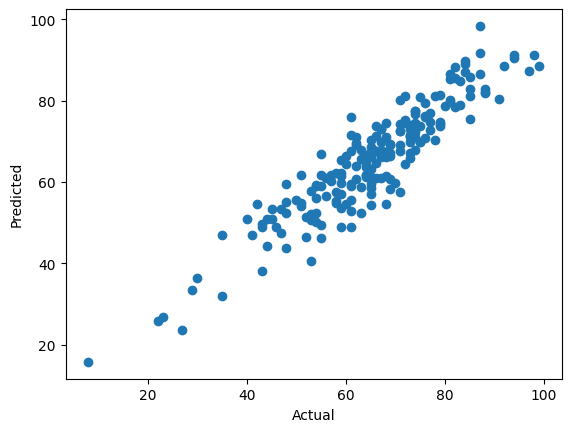

In [27]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

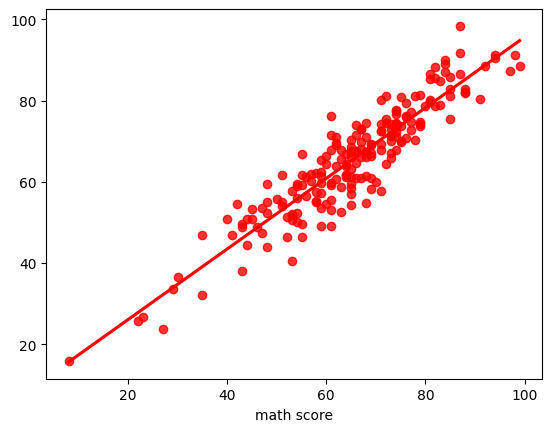

In [28]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red');

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
519,67,66.03125,0.96875
837,75,69.87500,5.12500
208,74,67.93750,6.06250
525,68,70.96875,-2.96875
978,55,49.53125,5.46875
...,...,...,...
647,64,61.65625,2.34375
481,52,46.50000,5.50000
134,74,73.43750,0.56250
366,69,58.34375,10.65625
